# Assignment 2 | Data analysis

Some initial data exploration for Assignment 2. Exploring the information apple has collected from me over a week. How leaky is my phone?

In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
import matplotlib.image as mpimg
from datetime import datetime
from matplotlib.dates import DateFormatter
from matplotlib import cm
from matplotlib import colors as cls
from math import nan
from wordcloud import WordCloud

In [2]:
# Import the data
filename = 'data.csv'
raw_data = pd.read_csv(filename)

# Store the data and keys
data = raw_data.to_numpy().T
keys = raw_data.keys().to_numpy()

# Print a snapshot of the dataset
raw_data

,accessor/identifier,accessor/identifierType,category,identifier,kind,timeStamp,type,outOfProcess,initiatedType,context,domain,contextVerificationType,domainType,firstTimeStamp,bundleID,domainOwner,hits,domainClassification
0,com.apple.mobileslideshow,bundleID,photos,6A941872-6E5A-4982-AA7F-CE67E43E0744,intervalBegin,2022-04-07T23:33:33.316+04:00,access,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,com.apple.mobileslideshow,bundleID,photos,6A941872-6E5A-4982-AA7F-CE67E43E0744,intervalEnd,2022-04-07T23:33:35.238+04:00,access,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,com.apple.mobileslideshow,bundleID,photos,36B9D017-B71F-4858-A951-6182F56D0B91,intervalBegin,2022-04-08T00:33:29.636+04:00,access,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,com.apple.mobileslideshow,bundleID,photos,D9DD17AE-844D-4025-B270-064A5B4FDDEF,intervalBegin,2022-04-08T00:33:29.871+04:00,access,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,com.apple.mobileslideshow,bundleID,photos,D9DD17AE-844D-4025-B270-064A5B4FDDEF,intervalEnd,2022-04-08T00:33:31.446+04:00,access,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10238,NaN,NaN,NaN,NaN,NaN,2022-05-02T18:47:28.613+04:00,networkActivity,NaN,AppInitiated,NaN,peoplestack-pa.googleapis.com,0.0,2.0,2022-05-02T14:53:11.730+04:00,com.google.Drive,NaN,2.0,1.0
10239,NaN,NaN,NaN,NaN,NaN,2022-05-02T14:53:19.995+04:00,networkActivity,NaN,AppInitiated,NaN,doc-10-bo-sheets.googleusercontent.com,0.0,2.0,2022-05-02T14:53:19.995+04:00,com.google.Drive,NaN,1.0,1.0
10240,NaN,NaN,NaN,NaN,NaN,2022-05-02T14:53:17.663+04:00,networkActivity,NaN,AppInitiated,NaN,blobcomments-pa.googleapis.com,0.0,2.0,2022-05-02T14:53:17.663+04:00,com.google.Drive,NaN,1.0,1.0
10241,NaN,NaN,NaN,NaN,NaN,2022-05-02T14:53:17.660+04:00,networkActivity,NaN,AppInitiated,NaN,docs.google.com,0.0,2.0,2022-05-02T14:53:17.660+04:00,com.google.Drive,NaN,1.0,1.0


/var/folders/w9/t1pwvp3n63x7yvpcz7pjvx_w0000gn/T/ipykernel_41602/1989782610.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([x.upper() for x in category_labels],fontsize=10)


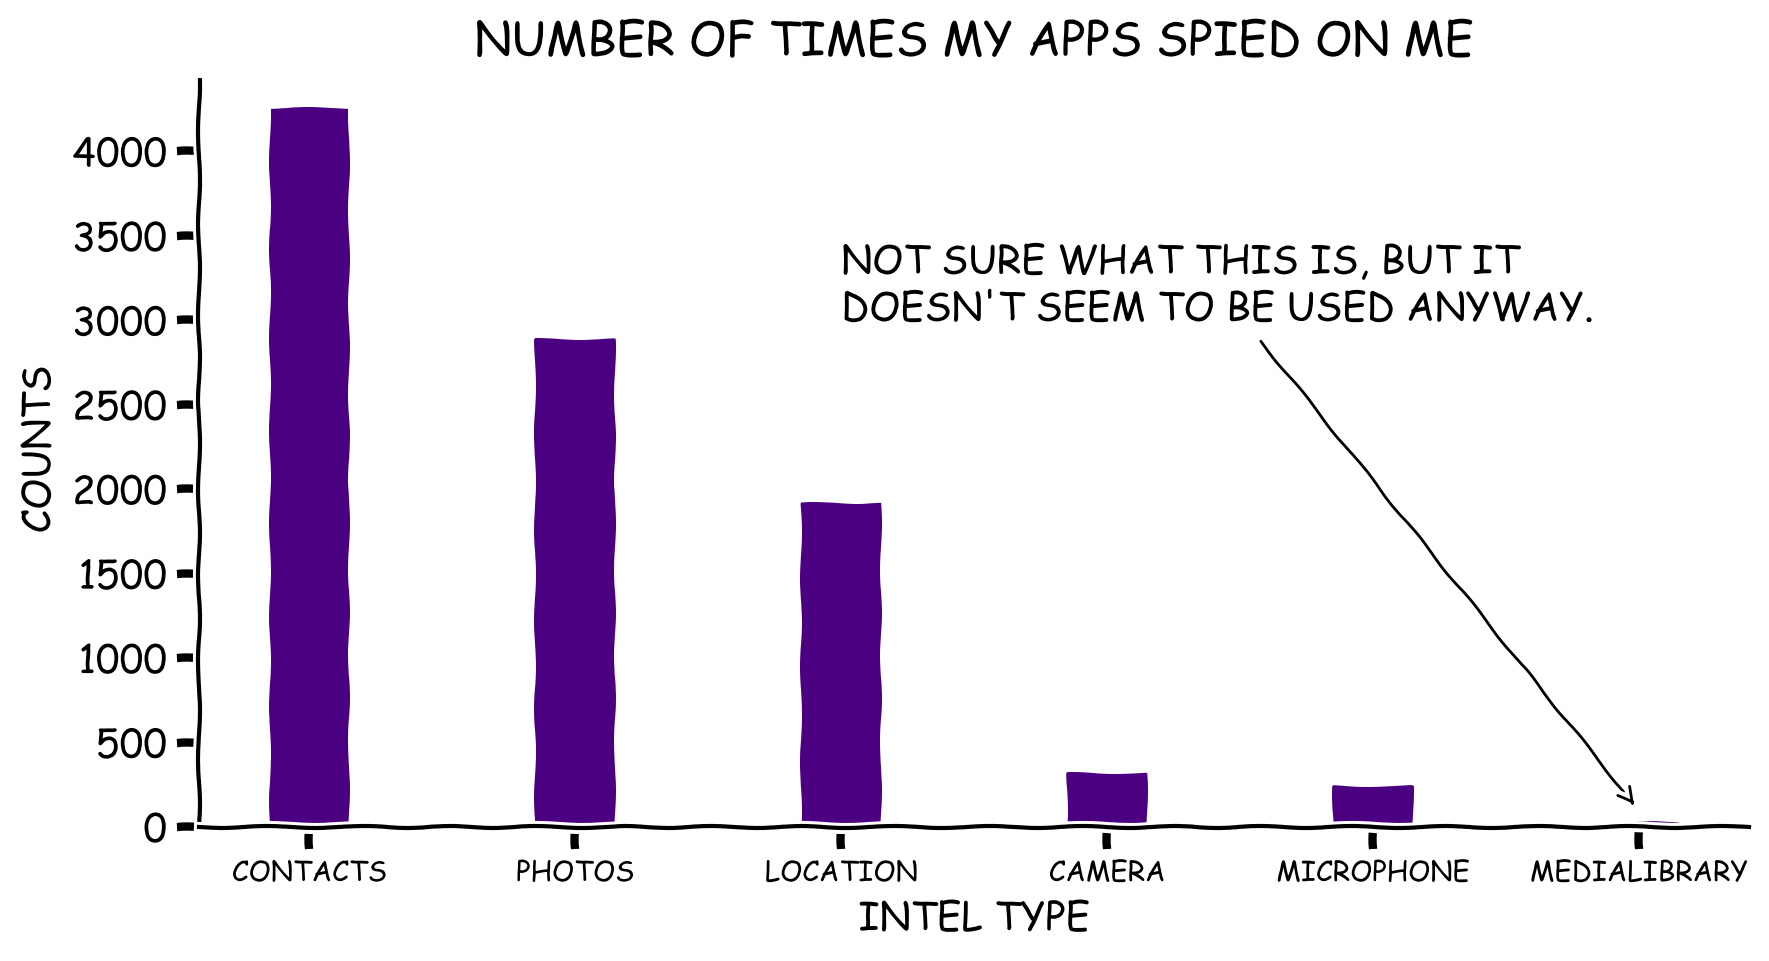

In [3]:
plt.xkcd()
# What of my sensors are accessed by my applications
category        = data[2][[True if type(d)==str else not np.isnan(d) for d in data[2]]]

# Create histograms
category_labels, category_freq = np.unique(category,return_counts=True)
# Sort them
def sort_parallel(A,B):
    idx = np.argsort(-B)
    return A[idx],B[idx]

category_labels, category_freq = sort_parallel(category_labels, category_freq)

# Plot the histograms
fig = plt.figure(figsize=(10,5),dpi=200)
ax1 = fig.add_subplot(111)

# Plot the data
ax1.bar([x.upper() for x in category_labels],category_freq,0.30,color='indigo')

# ANNOTATE
ax1.annotate(
    "NOT SURE WHAT THIS IS, BUT IT\nDOESN'T SEEM TO BE USED ANYWAY.",
    xy=(5, 100), arrowprops=dict(arrowstyle='->'), xytext=(2, 3000))

# Add labels etc.
ax1.set_xlabel('INTEL TYPE')
ax1.set_ylabel('COUNTS')
ax1.set_title("NUMBER OF TIMES MY APPS SPIED ON ME")
ax1.set_xticklabels([x.upper() for x in category_labels],fontsize=10)
ax1.spines.right.set_color('none')
ax1.spines.top.set_color('none')

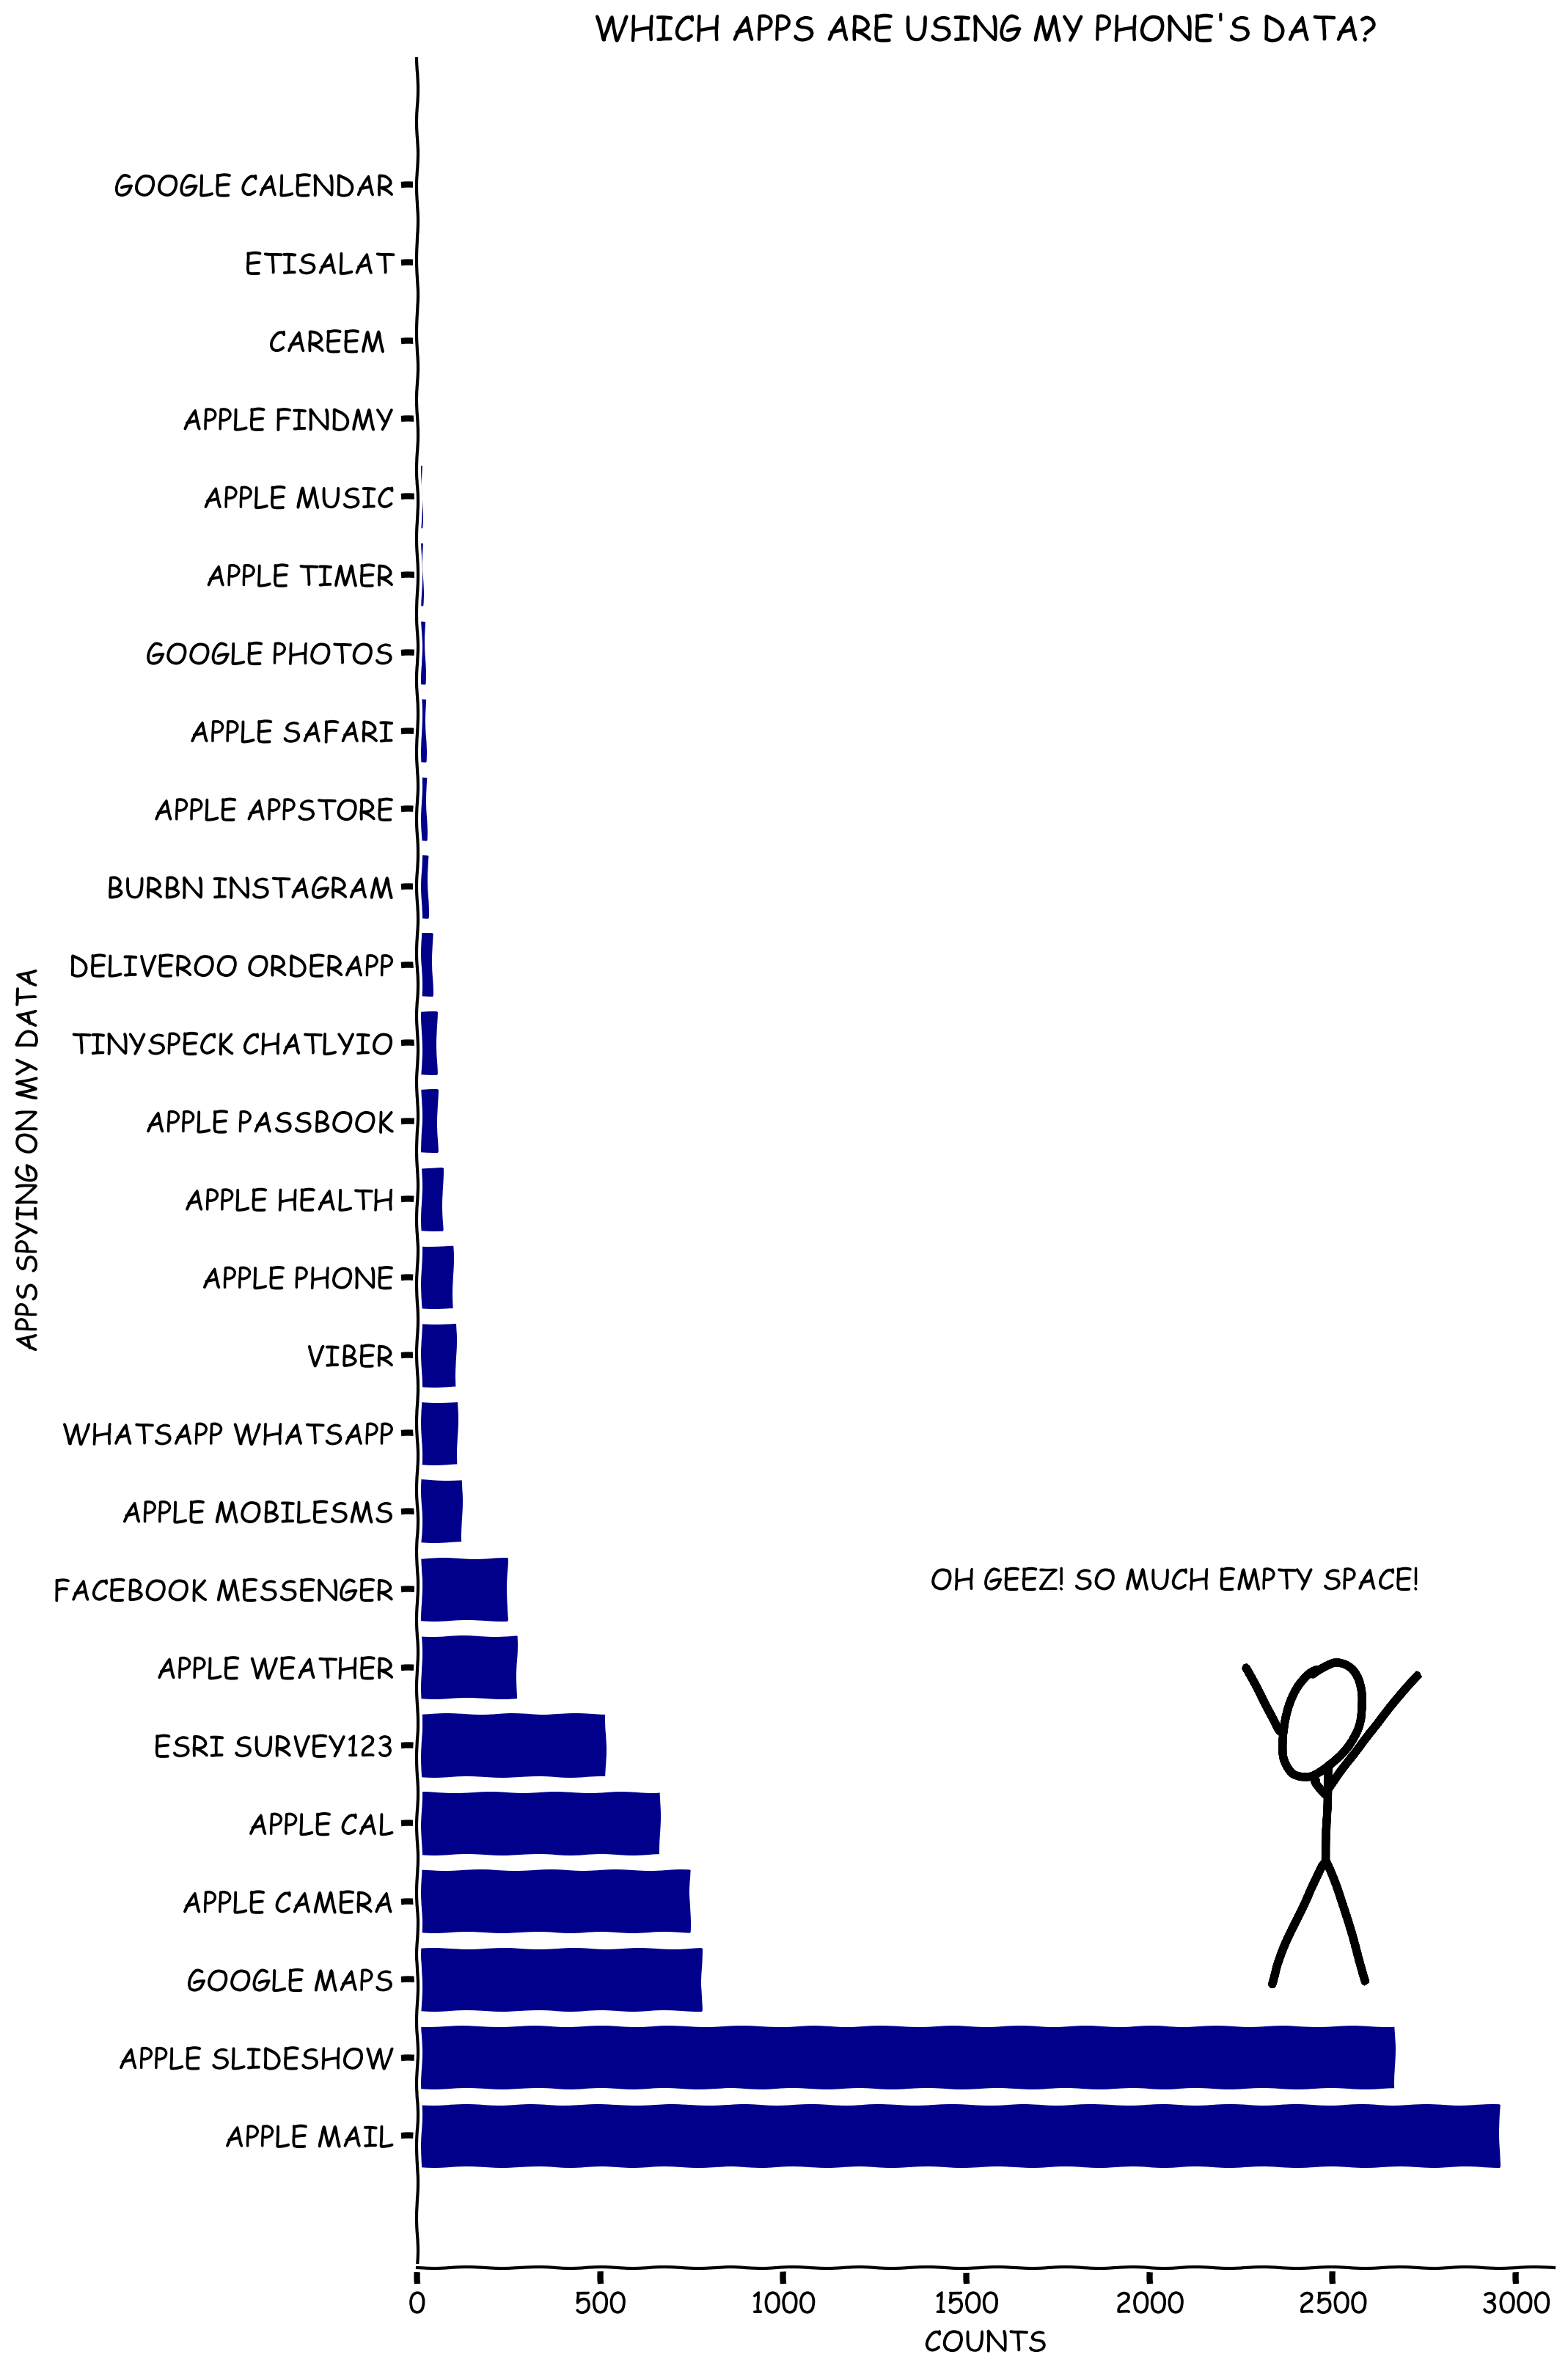

In [4]:
plt.xkcd()
# What of my sensors are accessed by my applications
accessor        = data[0][[True if type(d)==str else not np.isnan(d) for d in data[0]]]
accessor        = [d.removeprefix("com.").removeprefix("net.").removesuffix(".icma").removesuffix(".app").removesuffix('.etisalatmobileapp').replace('mobile','').replace(".",' ').upper() for d in accessor]

# Create histograms
accessor_labels, accessor_freq = np.unique(accessor,return_counts=True)

# Sort them
def sort_parallel(A,B):
    idx = np.argsort(-B)
    return A[idx],B[idx]

category_labels, category_freq = sort_parallel(category_labels, category_freq)
accessor_labels, accessor_freq = sort_parallel(accessor_labels, accessor_freq)

# Plot the histograms
fig = plt.figure(figsize=(10,20),dpi=200)
ax2 = fig.add_subplot(111)

# Plot the data
ax2.barh(accessor_labels,accessor_freq,color='darkblue')

# Add labels etc.
# ax1.set_xlabel('INTEL TYPE')
# ax1.set_ylabel('COUNTS')
# ax1.set_title("NUMBER OF TIMES MY APPS SPIED ON ME")
# ax1.set_xticklabels([x.upper() for x in category_labels],fontsize=10)

# Add the image
stick = mpimg.imread('visualisations/stickguy.png')
imagebox = OffsetImage(stick,zoom=0.15)
ax2.add_artist(AnnotationBbox(imagebox,(2500,4),frameon=False))

# ANNOTATE
ax2.annotate(
    "OH GEEZ! SO MUCH EMPTY SPACE!",
    xy=(2500, 20), xytext=(1400, 7))

ax2.set_xlabel('COUNTS')
ax2.set_ylabel('APPS SPYING ON MY DATA');
ax2.set_title('WHICH APPS ARE USING MY PHONE\'S DATA?')
ax2.spines.right.set_color('none')
ax2.spines.top.set_color('none')

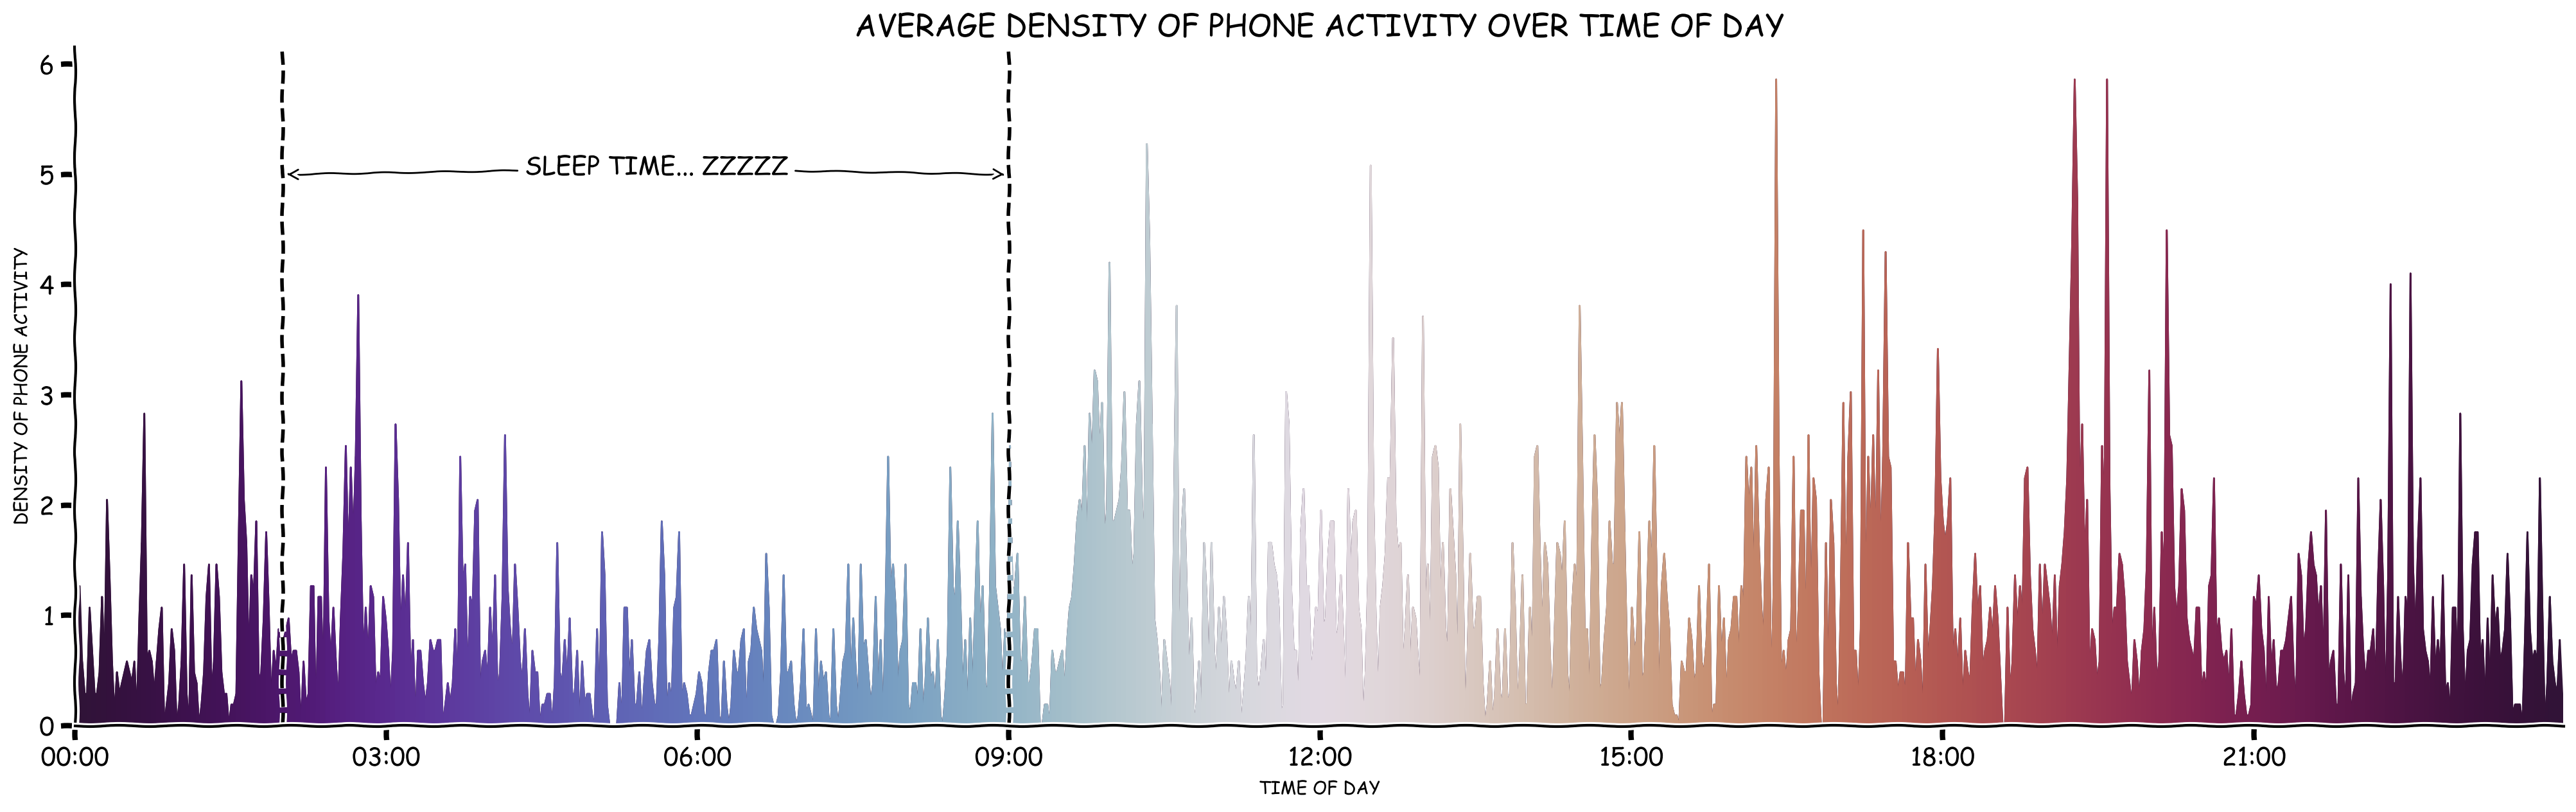

In [17]:
# When does my phone use data?
fig = plt.figure(figsize=(25,7),dpi=200)
ax = fig.add_subplot(111)

# Convert the timestamps
timestamps = [datetime.strptime(d,"%Y-%m-%dT%H:%M:%S.%f+04:00") for d in data[5]]
times      = [datetime.strptime(d.strftime("%H:%M:%S"),"%H:%M:%S") for d in timestamps]

n,x,_ = ax.hist(times,bins=1000,alpha=0,color='k',density=True,histtype='stepfilled');
bins = 0.5*(x[1:]+x[:-1])

N=500
splits = np.arange(N+1)/N
cmap    = cm.get_cmap('twilight_shifted')
ccolors = [cls.to_hex(cmap(split)) for split in splits]
splits = np.array((splits*len(bins)).tolist(),dtype=int)

for i in range(N-1):
    if i == 0:
        plt.fill_between(bins,n,color=ccolors[i],where= (bins <= bins[splits[i]]) + (bins >= bins[splits[-i]]),alpha=1)
    else:
        plt.fill_between(bins,n,color=ccolors[i],where= (bins >= bins[splits[i]]) * (bins <= bins[splits[i+1]]),alpha=1)

# Some customization
ax.set_xlabel('TIME OF DAY',fontsize=10);
ax.set_ylabel('DENSITY OF PHONE ACTIVITY',fontsize=10);

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('AVERAGE DENSITY OF PHONE ACTIVITY OVER TIME OF DAY',fontsize=17);

# mpld3.save_html(fig,'test.html')
date_form = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(date_form)
midnight_   = datetime.strptime("00:00","%H:%M")
midnight__  = datetime.strptime("23:59","%H:%M")
ax.set_xlim(midnight_,midnight__);

# Add some annotations
plt.axvline(x=datetime.strptime('02:00:00',"%H:%M:%S"),ls='--',c='k')
plt.axvline(x=datetime.strptime('09:00:00',"%H:%M:%S"),ls='--',c='k')
ax.annotate("SLEEP TIME... ZZZZZ",
            xy=(datetime.strptime('09:00:00',"%H:%M:%S"), 5),  arrowprops=dict(arrowstyle='->'),xytext=(datetime.strptime('04:20:00',"%H:%M:%S"),5));
ax.annotate("SLEEP TIME... ZZZZZ",
            xy=(datetime.strptime('02:00:00',"%H:%M:%S"), 5),  arrowprops=dict(arrowstyle='->'),xytext=(datetime.strptime('04:20:00',"%H:%M:%S"),5));




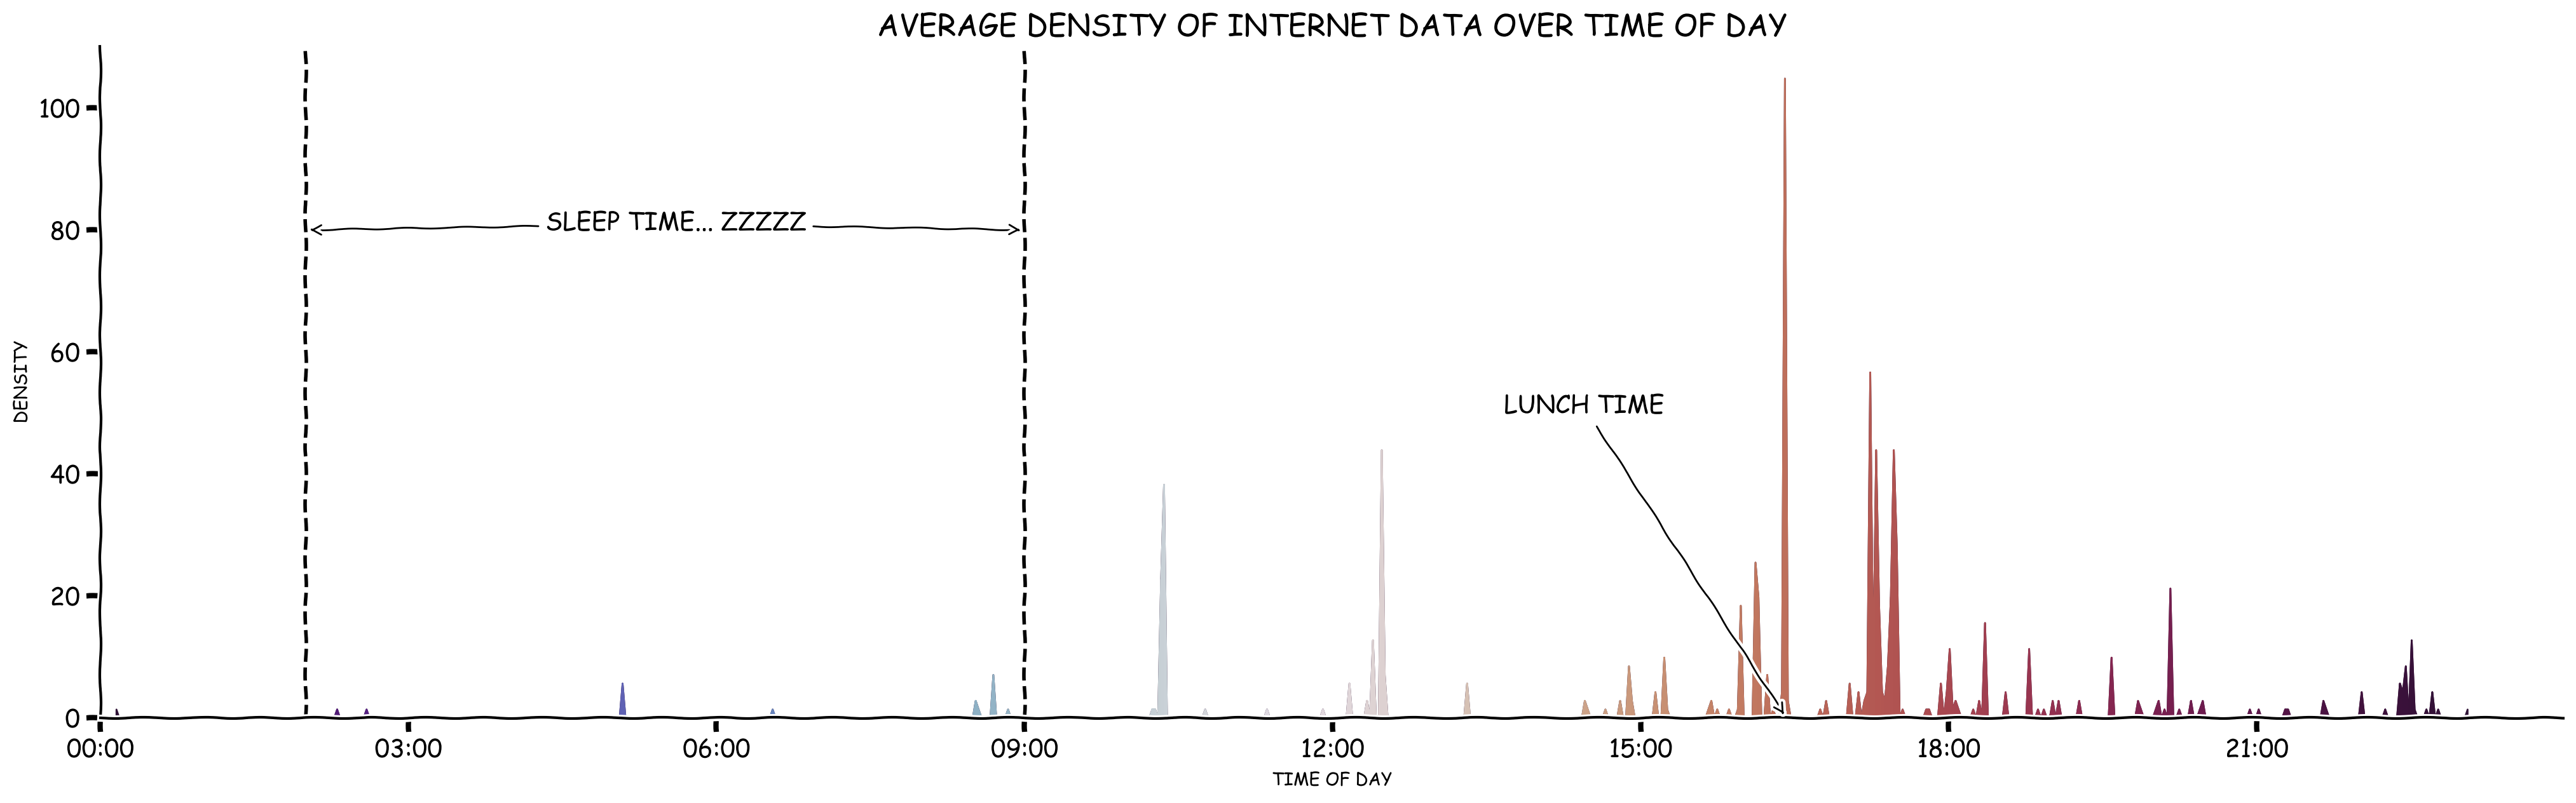

In [6]:
# Network data traffic
# When does my phone use data?
fig = plt.figure(figsize=(25,7),dpi=200)
ax = fig.add_subplot(111)

# Convert the timestamps

timestamps_n = [datetime.strptime(d,"%Y-%m-%dT%H:%M:%S.%f+04:00") for d in data[5][np.where(data[6]=='networkActivity')[0]]]
times      = [datetime.strptime(d.strftime("%H:%M:%S"),"%H:%M:%S") for d in timestamps_n]

n,x,_ = ax.hist(times,bins=800,alpha=0,color='k',density=True,histtype='stepfilled');
bins = 0.5*(x[1:]+x[:-1])

N=500
splits = np.arange(N+1)/N
cmap    = cm.get_cmap('twilight_shifted')
ccolors = [cls.to_hex(cmap(split)) for split in splits]
splits = np.array((splits*len(bins)).tolist(),dtype=int)

for i in range(N-1):
    if i == 0:
        plt.fill_between(bins,n,color=ccolors[i],where= (bins <= bins[splits[i]]) + (bins >= bins[splits[-i]]),alpha=1)
    else:
        plt.fill_between(bins,n,color=ccolors[i],where= (bins >= bins[splits[i]]) * (bins <= bins[splits[i+1]]),alpha=1)

# Some customization
ax.set_xlabel('TIME OF DAY',fontsize=10);
ax.set_ylabel('DENSITY',fontsize=10);

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('AVERAGE DENSITY OF INTERNET DATA OVER TIME OF DAY',fontsize=17);

# mpld3.save_html(fig,'test.html')
date_form = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(date_form)
midnight_   = datetime.strptime("00:00","%H:%M")
midnight__  = datetime.strptime("23:59","%H:%M")
ax.set_xlim(midnight_,midnight__);

# Add some annotations
plt.axvline(x=datetime.strptime('02:00:00',"%H:%M:%S"),ls='--',c='k')
plt.axvline(x=datetime.strptime('09:00:00',"%H:%M:%S"),ls='--',c='k')
ax.annotate("SLEEP TIME... ZZZZZ",
            xy=(datetime.strptime('09:00:00',"%H:%M:%S"), 80),  
            arrowprops=dict(arrowstyle='->'),xytext=(datetime.strptime('04:20:00',"%H:%M:%S"),80));
ax.annotate("SLEEP TIME... ZZZZZ",
            xy=(datetime.strptime('02:00:00',"%H:%M:%S"), 80),  
            arrowprops=dict(arrowstyle='->'),xytext=(datetime.strptime('04:20:00',"%H:%M:%S"),80));

ax.annotate("LUNCH TIME",
          xy=(datetime.strptime('16:25:00',"%H:%M:%S"), 0),  
           arrowprops=dict(arrowstyle='->'),xytext=(datetime.strptime('13:40:00',"%H:%M:%S"),50));


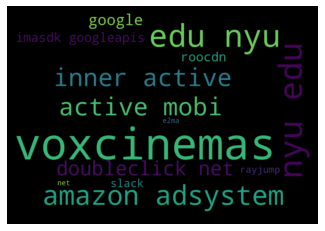

In [7]:
# Visualize data
network_data = data[9][[True if type(d)==str else not np.isnan(d) for d in data[9]]]
text = ''
for d in network_data: text+=d + ' '

wc = WordCloud(width=1024,height=int(0.7*1024),margin=0).generate(text)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [8]:
np.unique(data[8][[True if type(d)==str else not np.isnan(d) for d in data[8]]],return_counts=True)

(array(['AppInitiated', 'NonAppInitiated'], dtype=object), array([463, 128]))

In [14]:
app_initiated = data[14][[True if d=='AppInitiated' else False for d in data[8] ]]
app_initiated = np.unique([d.removeprefix('com.').removeprefix('net.').removesuffix('.ios').removesuffix('.app') for d in app_initiated],return_counts=True)
app_initiated

(array(['ae.healthshield', 'apple.AppStore', 'apple.Health', 'apple.Maps',
        'apple.MobileSMS', 'apple.Passbook', 'apple.Translate',
        'apple.mobilemail', 'apple.mobilephone', 'apple.mobilesafari',
        'apple.mobileslideshow', 'apple.reminders', 'apple.shortcuts',
        'apple.tips', 'apple.weather', 'burbn.instagram',
        'deliveroo.orderapp', 'duosecurity.DuoMobile', 'easybrain.sudoku',
        'facebook.Messenger', 'goodnotesapp.x', 'google.Docs',
        'google.Drive', 'google.Maps', 'google.calendar',
        'google.ios.youtube', 'google.photos', 'netflix.Netflix',
        'spotify.client', 'thomsonreuters.Reuters', 'tinyspeck.chatlyio',
        'ubercab.UberClient', 'viber', 'whatsapp.WhatsApp'], dtype='<U22'),
 array([  2,   8,   5,   1,   1,   2,   1,   2,   1,   7,   4,   3,   1,
          1,   3,  16,  25,   2, 152,  41,  14,  11,  15,  16,  18,  22,
          5,   6,  30,   1,  10,   2,  32,   3]))

In [12]:
nonapp_initiated = data[14][[True if d=='NonAppInitiated' else False for d in data[8] ]]
nonapp_initiated = np.unique([d.removeprefix('com.').removeprefix('net.') for d in nonapp_initiated],return_counts=True)
nonapp_initiated

(array(['apple.MobileAddressBook', 'apple.mobilecal', 'apple.mobilemail',
        'apple.mobilesafari', 'easybrain.sudoku'], dtype='<U23'),
 array([  2,   3,  12, 110,   1]))

In [ ]:
)